Harman Ransi <br>
3/22/24 <br>
Data Mining II <br>
Project - Dataset Generation
___

# 1) Generating Data... GPT Financial Market Analysis

\- Iterating through all days in dataset, fetching relevant financial information using GPT API <br>
\- Some days did not get any results, so a few reruns were needed

In [1]:
import api_keyz as api_keyz
from openai import OpenAI
import pandas as pd

/var/folders/ls/zp1zyfjj7lvb_43rl7gb902r0000gn/T/ipykernel_8989/3461702217.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
df = pd.read_csv('/Users/harmanransi/Documents/School/1) Spring 2024/Data Mining II/Project/Kaggle_Data/stock_tweets.csv')
df.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [6]:
key = api_keyz.gpt_key
client = OpenAI(
    api_key = key
)

In [41]:
# Convert 'Date' column to datetime object
df['Date'] = pd.to_datetime(df['Date'])
unique_dates = df['Date'].dt.date.unique()
unique_dates_as_strings = [str(date) for date in unique_dates]

In [42]:
print(unique_dates_as_strings)

['2022-09-29', '2022-09-28', '2022-09-27', '2022-09-26', '2022-09-25', '2022-09-24', '2022-09-23', '2022-09-22', '2022-09-21', '2022-09-20', '2022-09-19', '2022-09-18', '2022-09-17', '2022-09-16', '2022-09-15', '2022-09-14', '2022-09-13', '2022-09-12', '2022-09-11', '2022-09-10', '2022-09-09', '2022-09-08', '2022-09-07', '2022-09-06', '2022-09-05', '2022-09-04', '2022-09-03', '2022-09-02', '2022-09-01', '2022-08-31', '2022-08-30', '2022-08-29', '2022-08-28', '2022-08-27', '2022-08-26', '2022-08-25', '2022-08-24', '2022-08-23', '2022-08-22', '2022-08-21', '2022-08-20', '2022-08-19', '2022-08-18', '2022-08-17', '2022-08-16', '2022-08-15', '2022-08-14', '2022-08-13', '2022-08-12', '2022-08-11', '2022-08-10', '2022-08-09', '2022-08-08', '2022-08-07', '2022-08-06', '2022-08-05', '2022-08-04', '2022-08-03', '2022-08-02', '2022-08-01', '2022-07-31', '2022-07-30', '2022-07-29', '2022-07-28', '2022-07-27', '2022-07-26', '2022-07-25', '2022-07-24', '2022-07-23', '2022-07-22', '2022-07-21', '2022

In [50]:
# Reverse the order of the list
unique_dates_as_strings_reversed = list(reversed(unique_dates_as_strings))

print(unique_dates_as_strings_reversed)


['2021-09-30', '2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-16', '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30', '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021

ok so here is the thing. In the playground, it is like this...

use the 'gpt-4-turbo-preview' model. THe instructions should be this 'I am attempting to do stock prediction using a dataset of TSLA stock between 09-2021 and 09-2022. Here is what I want. I am going to iterate day by day, and I want you to remember what financial situations happened with TSLA stock specifically. I want you to classify the current state of TSLA stock into the following... negative, neutral, positive. I only want a one word answer. Base your answer on financial and trader sources mostly. Not the news.' 

In [52]:
import sys  # Import sys module for manipulating stdout

# Empty list to store results
results = []

# Loop through each date
for i, date in enumerate(unique_dates_as_strings_reversed):
    # Print the current date being processed
    sys.stdout.write(f"\rProcessing date {i+1}/{len(unique_dates_as_strings)}: {date}")
    sys.stdout.flush()  # Flush the stdout buffer to ensure the message is printed immediately
    
    response = client.chat.completions.create(
        model="gpt-4-turbo-preview",
        messages=[
            {"role": "system", "content": " 'You are a knowledgeable trader for TSLA stock between September 2021 and September 2022. I am going to ask you for a breif overview (2 short sentences) about major news regarding TSLA stock and what traders currently think of the stock. To clarify, I am NOT asking for you to analyze real-time events, but data you have already trained on '"},
            {"role": "user", "content": f"Give a the major news about TSLA stock for {date} from traders. Keep it to 2 - 3 short bullets (less than 12 words each). To clarify, I am NOT asking for you to analyze real-time events, but data you have already trained on."}
        ]
    )
    # Extract response content
    news = response.choices[0].message.content
    # Append date and response to results list
    results.append({'Date': date, 'News': news})

# Convert results list to DataFrame
df_results = pd.DataFrame(results)

# Print a new line after the loop completes
print("\n")

print(df_results)


Processing date 365/365: 2022-09-29

           Date                                               News
0    2021-09-30  - TSLA stock experienced volatility amid gener...
1    2021-10-01  - TSLA announced record Q3 delivery numbers, s...
2    2021-10-02  - TSLA Q3 deliveries exceed expectations, boos...
3    2021-10-03  - Tesla Q3 deliveries exceeded expectations, b...
4    2021-10-04  - TSLA Q3 production and delivery numbers exce...
..          ...                                                ...
360  2022-09-25  I'm unable to provide real-time or specific da...
361  2022-09-26  I'm unable to provide real-time data or news a...
362  2022-09-27  I'm sorry, but I can't provide real-time updat...
363  2022-09-28  I'm unable to provide real-time or very recent...
364  2022-09-29  I'm unable to provide real-time or specific hi...

[365 rows x 2 columns]


In [53]:
# Export DataFrame to CSV
df_results.to_csv('df_results.csv', index=False)


In [61]:
# Path to the CSV file
file_path = "/Users/harmanransi/Documents/School/1) Spring 2024/Data Mining II/Project/df_results.csv"

# Read the CSV file into a DataFrame
df_results = pd.read_csv(file_path)

In [63]:
df_results.head()

,Date,News
0,2021-09-30,- TSLA stock experienced volatility amid gener...
1,2021-10-01,"- TSLA announced record Q3 delivery numbers, s..."
2,2021-10-02,"- TSLA Q3 deliveries exceed expectations, boos..."
3,2021-10-03,"- Tesla Q3 deliveries exceeded expectations, b..."
4,2021-10-04,- TSLA Q3 production and delivery numbers exce...


In [64]:
import pandas as pd
import sys

# Filter df to isolate dates until 2022-05-15
df_filtered = df_results[df_results['Date'] <= '2022-05-15']

# Filter df_results to records containing "I'm sorry" in the 'News'
df_results_filtered = df_filtered[df_filtered['News'].str.contains("I'm sorry")]

# Extract unique dates from df_results_filtered
unique_dates_filtered = df_results_filtered['Date'].tolist()

# Empty list to store results
previous_mistakes_results = []

# Loop through each date in reverse order
for i, date in enumerate(unique_dates_filtered):
    # Print the current date being processed
    sys.stdout.write(f"\rProcessing date {i+1}/{len(df_results_filtered)}: {date}")
    sys.stdout.flush()  # Flush the stdout buffer to ensure the message is printed immediately
    
    # Check if the date is in df_results_filtered
    if date in unique_dates_filtered:
        response = client.chat.completions.create(
            model="gpt-4-turbo-preview",
            messages=[
                {"role": "system", "content": " 'You are a knowledgeable trader for TSLA stock between September 2021 and September 2022. I am going to ask you for a breif overview (2 short sentences) about major news regarding TSLA stock and what traders currently think of the stock. To clarify, I am NOT asking for you to analyze real-time events, but data you have already trained on '"},
                {"role": "user", "content": f"Give a the major news about TSLA stock for {date} from traders. Keep it to 2 - 3 short bullets (less than 12 words each). To clarify, I am NOT asking for you to analyze real-time events, but data you have already trained on."}
            ]
        )
        # Extract response content
        news = response.choices[0].message.content
        # Append date and response to results list
        previous_mistakes_results.append({'Date': date, 'News': news})

# Convert results list to DataFrame
previous_mistakes_df = pd.DataFrame(previous_mistakes_results)

# Export DataFrame to CSV
previous_mistakes_df.to_csv('previous_mistakes_df.csv', index=False)



Processing date 14/14: 2022-05-08

In [68]:
# Filter df_results_filtered to records containing "I'm sorry" or "I'm unable" in the 'News' column
df_results_filtered = previous_mistakes_df[previous_mistakes_df['News'].str.contains("I'm sorry|I'm unable")]

# Display the filtered DataFrame
print(df_results_filtered)


         Date                                               News
1  2022-03-27  I'm sorry, but I can't provide real-time marke...
3  2022-04-11  I'm unable to provide real-time updates or inf...


In [69]:
# Extract unique dates from df_results_filtered
unique_dates_filtered = df_results_filtered['Date'].tolist()

# Empty list to store results
previous_mistakes_results = []

# Loop through each date in reverse order
for i, date in enumerate(unique_dates_filtered):
    # Print the current date being processed
    sys.stdout.write(f"\rProcessing date {i+1}/{len(df_results_filtered)}: {date}")
    sys.stdout.flush()  # Flush the stdout buffer to ensure the message is printed immediately
    
    # Check if the date is in df_results_filtered
    if date in unique_dates_filtered:
        response = client.chat.completions.create(
            model="gpt-4-turbo-preview",
            messages=[
                {"role": "system", "content": " 'You are a knowledgeable trader for TSLA stock between September 2021 and September 2022. I am going to ask you for a breif overview (2 short sentences) about major news regarding TSLA stock and what traders currently think of the stock. To clarify, I am NOT asking for you to analyze real-time events, but data you have already trained on '"},
                {"role": "user", "content": f"Give a the major news about TSLA stock for {date} from traders. Keep it to 2 - 3 short bullets (less than 12 words each). To clarify, I am NOT asking for you to analyze real-time events, but data you have already trained on."}
            ]
        )
        # Extract response content
        news = response.choices[0].message.content
        # Append date and response to results list
        previous_mistakes_results.append({'Date': date, 'News': news})

# Convert results list to DataFrame
previous_mistakes_df = pd.DataFrame(previous_mistakes_results)

# Export DataFrame to CSV
previous_mistakes_df.to_csv('previous_mistakes_df_3.csv', index=False)


Processing date 2/2: 2022-04-11

\- After fetching information from GPT, need to classify the results as positive, neutral, or negative

In [2]:
import pandas as pd

# File paths
file_paths = [
    "/Users/harmanransi/Documents/School/1) Spring 2024/Data Mining II/Project/GPT_API_Data/financial_news_data.csv",
    "/Users/harmanransi/Documents/School/1) Spring 2024/Data Mining II/Project/GPT_API_Data/fixes_1.csv",
    "/Users/harmanransi/Documents/School/1) Spring 2024/Data Mining II/Project/GPT_API_Data/fixes_2.csv",
    "/Users/harmanransi/Documents/School/1) Spring 2024/Data Mining II/Project/GPT_API_Data/fixes_3.csv"
]

# List to store DataFrames
dataframes = []

# Iterate over file paths and read CSV files into DataFrames
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Rename the DataFrames for better identification
financial_news_data_df = dataframes[0]
fixes_1_df = dataframes[1]
fixes_2_df = dataframes[2]
fixes_3_df = dataframes[3]


In [3]:
import pandas as pd

financial_news_data_df['Date'] = pd.to_datetime(financial_news_data_df['Date'])
financial_news_data_df = financial_news_data_df[financial_news_data_df['Date'] < '2022-05-15']
print(financial_news_data_df)


          Date                                               News
0   2021-09-30  - TSLA stock experienced volatility amid gener...
1   2021-10-01  - TSLA announced record Q3 delivery numbers, s...
2   2021-10-02  - TSLA Q3 deliveries exceed expectations, boos...
3   2021-10-03  - Tesla Q3 deliveries exceeded expectations, b...
4   2021-10-04  - TSLA Q3 production and delivery numbers exce...
..         ...                                                ...
222 2022-05-10  - TSLA stock experienced significant volatilit...
223 2022-05-11  I must clarify that my last training data only...
224 2022-05-12  - TSLA stock experiences volatility amid broad...
225 2022-05-13  - TSLA stock sees fluctuation amid Elon Musk's...
226 2022-05-14  - No specific news for TSLA on 2022-05-14 avai...

[227 rows x 2 columns]


In [4]:
# Iterate through each row in fixes_1_df
for index, row in fixes_1_df.iterrows():
    corresponding_row_index = financial_news_data_df[financial_news_data_df['Date'] == row['Date']].index
    if not corresponding_row_index.empty:
        financial_news_data_df.at[corresponding_row_index[0], 'News'] = row['News']

print(financial_news_data_df)


          Date                                               News
0   2021-09-30  - TSLA stock experienced volatility amid gener...
1   2021-10-01  - TSLA announced record Q3 delivery numbers, s...
2   2021-10-02  - TSLA Q3 deliveries exceed expectations, boos...
3   2021-10-03  - Tesla Q3 deliveries exceeded expectations, b...
4   2021-10-04  - TSLA Q3 production and delivery numbers exce...
..         ...                                                ...
222 2022-05-10  - TSLA stock experienced significant volatilit...
223 2022-05-11  I must clarify that my last training data only...
224 2022-05-12  - TSLA stock experiences volatility amid broad...
225 2022-05-13  - TSLA stock sees fluctuation amid Elon Musk's...
226 2022-05-14  - No specific news for TSLA on 2022-05-14 avai...

[227 rows x 2 columns]


In [5]:
# Iterate through each row in fixes_1_df
for index, row in fixes_2_df.iterrows():
    corresponding_row_index = financial_news_data_df[financial_news_data_df['Date'] == row['Date']].index
    if not corresponding_row_index.empty:
        financial_news_data_df.at[corresponding_row_index[0], 'News'] = row['News']

print(financial_news_data_df)

          Date                                               News
0   2021-09-30  - TSLA stock experienced volatility amid gener...
1   2021-10-01  - TSLA announced record Q3 delivery numbers, s...
2   2021-10-02  - TSLA Q3 deliveries exceed expectations, boos...
3   2021-10-03  - Tesla Q3 deliveries exceeded expectations, b...
4   2021-10-04  - TSLA Q3 production and delivery numbers exce...
..         ...                                                ...
222 2022-05-10  - TSLA stock experienced significant volatilit...
223 2022-05-11  I must clarify that my last training data only...
224 2022-05-12  - TSLA stock experiences volatility amid broad...
225 2022-05-13  - TSLA stock sees fluctuation amid Elon Musk's...
226 2022-05-14  - No specific news for TSLA on 2022-05-14 avai...

[227 rows x 2 columns]


In [6]:
# Iterate through each row in fixes_3_df
for index, row in fixes_2_df.iterrows():
    corresponding_row_index = financial_news_data_df[financial_news_data_df['Date'] == row['Date']].index
    if not corresponding_row_index.empty:
        financial_news_data_df.at[corresponding_row_index[0], 'News'] = row['News']

print(financial_news_data_df)

          Date                                               News
0   2021-09-30  - TSLA stock experienced volatility amid gener...
1   2021-10-01  - TSLA announced record Q3 delivery numbers, s...
2   2021-10-02  - TSLA Q3 deliveries exceed expectations, boos...
3   2021-10-03  - Tesla Q3 deliveries exceeded expectations, b...
4   2021-10-04  - TSLA Q3 production and delivery numbers exce...
..         ...                                                ...
222 2022-05-10  - TSLA stock experienced significant volatilit...
223 2022-05-11  I must clarify that my last training data only...
224 2022-05-12  - TSLA stock experiences volatility amid broad...
225 2022-05-13  - TSLA stock sees fluctuation amid Elon Musk's...
226 2022-05-14  - No specific news for TSLA on 2022-05-14 avai...

[227 rows x 2 columns]


In [8]:
print(financial_news_data_df)

          Date                                               News
0   2021-09-30  - TSLA stock experienced volatility amid gener...
1   2021-10-01  - TSLA announced record Q3 delivery numbers, s...
2   2021-10-02  - TSLA Q3 deliveries exceed expectations, boos...
3   2021-10-03  - Tesla Q3 deliveries exceeded expectations, b...
4   2021-10-04  - TSLA Q3 production and delivery numbers exce...
..         ...                                                ...
222 2022-05-10  - TSLA stock experienced significant volatilit...
223 2022-05-11  I must clarify that my last training data only...
224 2022-05-12  - TSLA stock experiences volatility amid broad...
225 2022-05-13  - TSLA stock sees fluctuation amid Elon Musk's...
226 2022-05-14  - No specific news for TSLA on 2022-05-14 avai...

[227 rows x 2 columns]


\- Iterate through financial_news_data_df, classify as positive neutral or negative

In [18]:
import sys  # Import sys module for manipulating stdout

# Empty list to store results
results = []

# Loop through each row in financial_news_data_df
for index, row in financial_news_data_df.iterrows():
    # Print the current date being processed
    sys.stdout.write(f"\rProcessing row {index + 1}/{len(financial_news_data_df)}")
    sys.stdout.flush()  # Flush the stdout buffer to ensure the message is printed immediately
    
    # Extract the news text from the row
    news_text = row['News']
    news_date = row['Date']
    
    # Use the API to classify the sentiment of the news
    response = client.chat.completions.create(
        model="gpt-4-turbo-preview",
        messages=[
            {"role": "system", "content": " 'You are a knowledgeable trader for TSLA stock between September 2021 and May 2022. I am going to give you bits of financial news regarding TSLA stock. I want you to classify the news I give you as 'positive', 'neutral', or 'negative'. ONLY ONE WORD ANSWER'"},
            {"role": "user", "content": f"This is the news on {news_date}: \n {news_text} \n Classify this TSLA stock news as 'positive', 'neutral', or 'negative'. ONLY ONE WORD ANSWER"}
        ]
    )
    
    # Extract sentiment from the API response
    news_sentiment = response.choices[0].message.content
    
    # Append date and sentiment to results list
    results.append({'Date': row['Date'], 'News_Sentiment': news_sentiment})

# Convert results list to DataFrame
sentiment_df = pd.DataFrame(results)

# Merge sentiment_df with financial_news_data_df based on 'Date'
financial_news_data_df = pd.merge(financial_news_data_df, sentiment_df, on='Date')

# Print a new line after the loop completes
print("\n")

# Print the updated financial_news_data_df
print(financial_news_data_df)


Processing row 227/227

          Date                                               News  \
0   2021-09-30  - TSLA stock experienced volatility amid gener...   
1   2021-10-01  - TSLA announced record Q3 delivery numbers, s...   
2   2021-10-02  - TSLA Q3 deliveries exceed expectations, boos...   
3   2021-10-03  - Tesla Q3 deliveries exceeded expectations, b...   
4   2021-10-04  - TSLA Q3 production and delivery numbers exce...   
..         ...                                                ...   
222 2022-05-10  - TSLA stock experienced significant volatilit...   
223 2022-05-11  I must clarify that my last training data only...   
224 2022-05-12  - TSLA stock experiences volatility amid broad...   
225 2022-05-13  - TSLA stock sees fluctuation amid Elon Musk's...   
226 2022-05-14  - No specific news for TSLA on 2022-05-14 avai...   

    News_Sentiment  
0          neutral  
1         positive  
2         positive  
3         positive  
4         positive  
..             ...  


In [19]:
financial_news_data_df.head()

,Date,News,News_Sentiment
0,2021-09-30,- TSLA stock experienced volatility amid gener...,neutral
1,2021-10-01,"- TSLA announced record Q3 delivery numbers, s...",positive
2,2021-10-02,"- TSLA Q3 deliveries exceed expectations, boos...",positive
3,2021-10-03,"- Tesla Q3 deliveries exceeded expectations, b...",positive
4,2021-10-04,- TSLA Q3 production and delivery numbers exce...,positive


In [21]:
# Export financial_news_data_df to CSV with exclamation mark in the file name
financial_news_data_df.to_csv('!news_sentiment_data.csv', index=False)

print("Data exported successfully.")


Data exported successfully.


# 2) Generating Data... GPT Sentiment Analysis

In [2]:
import pandas as pd

df = pd.read_csv('/Users/harmanransi/Documents/School/1) Spring 2024/Data Mining II/Project/Kaggle_Data/stock_tweets.csv')

In [3]:
df.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [4]:
# Isolate the DataFrame for rows with Stock Name of TSLA
tsla_df = df[df['Stock Name'] == 'TSLA']
tsla_df.head()


,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [5]:
# Calculate the length of the DataFrame
total_length = len(tsla_df)

# Calculate the lengths of each part
part_length = total_length // 3

# Divide the DataFrame into three parts
part1 = tsla_df[:part_length]
part2 = tsla_df[part_length:2*part_length]
part3 = tsla_df[2*part_length:]

# Print the lengths of each part
print(f"Length of Part 1: {len(part1)}")
print(f"Length of Part 2: {len(part2)}")
print(f"Length of Part 3: {len(part3)}")


Length of Part 1: 12474
Length of Part 2: 12474
Length of Part 3: 12474


## part 1

In [31]:
import sys  # Import sys module for manipulating stdout

# Empty list to store results
results = []

# Loop through each row in financial_news_data_df
for index, row in part1.iterrows():
    # Print the current date being processed
    sys.stdout.write(f"\rProcessing row {index + 1}/{len(part1)}")
    sys.stdout.flush()  # Flush the stdout buffer to ensure the message is printed immediately
    
    # Extract the news text from the row
    tweet = row['Tweet']
    
    # Use the API to classify the sentiment of the news
    response = client.chat.completions.create(
        model="gpt-3.5-turbo-16k-0613",
        messages=[
            {"role": "system", "content": " ' You are going to analyze the sentiment of a tweet I give you. It is in regards to tweets directed at TSLA. Classify the tweets as either 'positive' 'neutral' or 'negative'. ONLY ONE WORD RESPONSE! ' "},
            {"role": "user", "content": f"This is the tweet \n {tweet} \n  It is in regards to tweets directed at TSLA. Classify the tweets as either 'positive' 'neutral' or 'negative'. ONLY ONE WORD RESPONSE! "}
        ]
    )
    
    # Extract sentiment from the API response
    tweet_sentiment = response.choices[0].message.content
    
    # Append date and sentiment to results list
    results.append({'Date': row['Date'], 'Tweet': tweet, 'Tweet_Sentiment': tweet_sentiment})

# Convert results list to DataFrame
tweet_sentiment_df = pd.DataFrame(results)

# Merge sentiment_df with financial_news_data_df based on 'Date'
tweets_analyzed_1 = pd.merge(part1, tweet_sentiment_df, on='Tweet')

# Print a new line after the loop completes
print("\n")

# Print the updated financial_news_data_df
print(tweets_analyzed_1)
tweets_analyzed_1.to_csv('tweets_analyzed_1.csv', index=False)

Processing row 12474/12474

                          Date_x  \
0      2022-09-29 23:41:16+00:00   
1      2022-09-29 23:24:43+00:00   
2      2022-09-29 23:18:08+00:00   
3      2022-09-29 22:40:07+00:00   
4      2022-09-29 22:27:05+00:00   
...                          ...   
12617  2022-05-09 16:33:29+00:00   
12618  2022-05-09 16:31:34+00:00   
12619  2022-05-09 16:20:18+00:00   
12620  2022-05-09 16:15:50+00:00   
12621  2022-05-09 16:11:47+00:00   

                                                   Tweet Stock Name  \
0      Mainstream media has done an amazing job at br...       TSLA   
1      Tesla delivery estimates are at around 364k fr...       TSLA   
2      3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3      @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4      @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   
...                                                  ...        ...   
12617  Yes, we are still going green. The 

After Part 1: $14.20 / $27.00

## part2

2a

In [11]:
import api_keyz as api_keyz
from openai import OpenAI
import pandas as pd

key = api_keyz.gpt_key
client = OpenAI(
    api_key = key
)

In [ ]:
import sys  # Import sys module for manipulating stdout

# Empty list to store results
results = []

# Loop through each row in financial_news_data_df
for index, row in part2.iterrows():
    # Print the current date being processed
    sys.stdout.write(f"\rProcessing row {index + 1}/{len(part1) + len(part2)}")
    sys.stdout.flush()  # Flush the stdout buffer to ensure the message is printed immediately
    
    # Extract the news text from the row
    tweet = row['Tweet']
    
    # Use the API to classify the sentiment of the news
    response = client.chat.completions.create(
        model="gpt-3.5-turbo-16k-0613",
        messages=[
            {"role": "system", "content": " ' You are going to analyze the sentiment of a tweet I give you. It is in regards to tweets directed at TSLA. Classify the tweets as either 'positive' 'neutral' or 'negative'. ONLY ONE WORD RESPONSE! ' "},
            {"role": "user", "content": f"This is the tweet \n {tweet} \n  It is in regards to tweets directed at TSLA. Classify the tweets as either 'positive' 'neutral' or 'negative'. ONLY ONE WORD RESPONSE! "}
        ]
    )
    
    # Extract sentiment from the API response
    tweet_sentiment = response.choices[0].message.content
    
    # Append date and sentiment to results list
    results.append({'Date': row['Date'], 'Tweet': tweet, 'Tweet_Sentiment': tweet_sentiment})

# Convert results list to DataFrame
tweet_sentiment_df = pd.DataFrame(results)

# Merge sentiment_df with financial_news_data_df based on 'Date'
tweets_analyzed_2 = pd.merge(part2, tweet_sentiment_df, on='Tweet')

# Print a new line after the loop completes
print("\n")

# Print the updated financial_news_data_df
print(tweets_analyzed_2)
tweets_analyzed_2.to_csv('tweets_analyzed_2.csv', index=False)

In [13]:
import pandas as pd

# Assuming 'results' is a list of dictionaries with keys 'Date', 'Tweet', and 'Tweet_Sentiment'

# Convert the 'results' list to a DataFrame
results_df = pd.DataFrame(results)

# Export the DataFrame to a CSV file
results_df.to_csv('tweets_analyzed_2a.csv', index=False)


2b

In [6]:
import api_keyz as api_keyz
from openai import OpenAI
import pandas as pd

key = api_keyz.gpt_key
client = OpenAI(
    api_key = key
)

In [7]:
import sys  # Import sys module for manipulating stdout

# Empty list to store results
results = []

# Loop through each row in part2 starting from index 19301
for index, row in part2.iloc[6827:].iterrows():
    # Print the current date being processed
    sys.stdout.write(f"\rProcessing row {index + 1}/{len(part1) + len(part2)}")
    sys.stdout.flush()  # Flush the stdout buffer to ensure the message is printed immediately
    
    # Extract the news text from the row
    tweet = row['Tweet']
    
    # Use the API to classify the sentiment of the news
    response = client.chat.completions.create(
        model="gpt-3.5-turbo-16k-0613",
        messages=[
            {"role": "system", "content": " ' You are going to analyze the sentiment of a tweet I give you. It is in regards to tweets directed at TSLA. Classify the tweets as either 'positive' 'neutral' or 'negative'. ONLY ONE WORD RESPONSE! ' "},
            {"role": "user", "content": f"This is the tweet \n {tweet} \n  It is in regards to tweets directed at TSLA. Classify the tweets as either 'positive' 'neutral' or 'negative'. ONLY ONE WORD RESPONSE! "}
        ]
    )
    
    # Extract sentiment from the API response
    tweet_sentiment = response.choices[0].message.content
    
    # Append date and sentiment to results list
    results.append({'Date': row['Date'], 'Tweet': tweet, 'Tweet_Sentiment': tweet_sentiment})

# Convert results list to DataFrame
tweets_analyzed_2b = pd.DataFrame(results)

# Print a new line after the loop completes
print("\n")

# Save the updated dataframe to a CSV file
tweets_analyzed_2b.to_csv('tweets_analyzed_2b.csv', index=False)


Processing row 24948/24948



After Part 2: ... / $27.00

## part 3

In [6]:
import api_keyz as api_keyz
from openai import OpenAI
import pandas as pd

key = api_keyz.gpt_key
client = OpenAI(
    api_key = key
)

In [7]:
# Calculate the length of part3
part3_length = len(part3)

# Calculate the lengths of each part
part_length = part3_length // 3

# Divide part3 into three parts
part3a = part3[:part_length]
part3b = part3[part_length:2*part_length]
part3c = part3[2*part_length:]


part a

In [12]:
import sys  # Import sys module for manipulating stdout

# Empty list to store results
results = []

# Loop through each row in financial_news_data_df
for index, row in part3a.iterrows():
    # Print the current date being processed
    sys.stdout.write(f"\rProcessing row {index + 1}/{len(part1) + len(part2) + len(part3)}")
    sys.stdout.flush()  # Flush the stdout buffer to ensure the message is printed immediately
    
    # Extract the news text from the row
    tweet = row['Tweet']
    
    # Use the API to classify the sentiment of the news
    response = client.chat.completions.create(
        model="gpt-3.5-turbo-16k-0613",
        messages=[
            {"role": "system", "content": " ' You are going to analyze the sentiment of a tweet I give you. It is in regards to tweets directed at TSLA. Classify the tweets as either 'positive' 'neutral' or 'negative'. ONLY ONE WORD RESPONSE! ' "},
            {"role": "user", "content": f"This is the tweet \n {tweet} \n  It is in regards to tweets directed at TSLA. Classify the tweets as either 'positive' 'neutral' or 'negative'. ONLY ONE WORD RESPONSE! "}
        ]
    )
    
    # Extract sentiment from the API response
    tweet_sentiment = response.choices[0].message.content
    
    # Append date and sentiment to results list
    results.append({'Date': row['Date'], 'Tweet': tweet, 'Tweet_Sentiment': tweet_sentiment})


# Convert results list to DataFrame
tweets_analyzed_3a = pd.DataFrame(results)

# Print a new line after the loop completes
print("\n")

# Save the updated dataframe to a CSV file
tweets_analyzed_3a.to_csv('tweets_analyzed_3a.csv', index=False)

Processing row 29106/37422



part b

In [9]:
import sys  # Import sys module for manipulating stdout

# Empty list to store results
results = []

# Loop through each row in financial_news_data_df
for index, row in part3b.iterrows():
    # Print the current date being processed
    sys.stdout.write(f"\rProcessing row {index + 1}/{len(part1) + len(part2) + len(part3)}")
    sys.stdout.flush()  # Flush the stdout buffer to ensure the message is printed immediately
    
    # Extract the news text from the row
    tweet = row['Tweet']
    
    # Use the API to classify the sentiment of the news
    response = client.chat.completions.create(
        model="gpt-3.5-turbo-16k-0613",
        messages=[
            {"role": "system", "content": " ' You are going to analyze the sentiment of a tweet I give you. It is in regards to tweets directed at TSLA. Classify the tweets as either 'positive' 'neutral' or 'negative'. ONLY ONE WORD RESPONSE! ' "},
            {"role": "user", "content": f"This is the tweet \n {tweet} \n  It is in regards to tweets directed at TSLA. Classify the tweets as either 'positive' 'neutral' or 'negative'. ONLY ONE WORD RESPONSE! "}
        ]
    )
    
    # Extract sentiment from the API response
    tweet_sentiment = response.choices[0].message.content
    
    # Append date and sentiment to results list
    results.append({'Date': row['Date'], 'Tweet': tweet, 'Tweet_Sentiment': tweet_sentiment})


# Convert results list to DataFrame
tweets_analyzed_3b = pd.DataFrame(results)

# Print a new line after the loop completes
print("\n")

# Save the updated dataframe to a CSV file
tweets_analyzed_3b.to_csv('tweets_analyzed_3b.csv', index=False)

Processing row 33264/37422



part c

In [8]:
import sys  # Import sys module for manipulating stdout

# Empty list to store results
results = []

# Loop through each row in financial_news_data_df
for index, row in part3c.iterrows():
    # Print the current date being processed
    sys.stdout.write(f"\rProcessing row {index + 1}/{len(part1) + len(part2) + len(part3)}")
    sys.stdout.flush()  # Flush the stdout buffer to ensure the message is printed immediately
    
    # Extract the news text from the row
    tweet = row['Tweet']
    
    # Use the API to classify the sentiment of the news
    response = client.chat.completions.create(
        model="gpt-3.5-turbo-16k-0613",
        messages=[
            {"role": "system", "content": " ' You are going to analyze the sentiment of a tweet I give you. It is in regards to tweets directed at TSLA. Classify the tweets as either 'positive' 'neutral' or 'negative'. ONLY ONE WORD RESPONSE! ' "},
            {"role": "user", "content": f"This is the tweet \n {tweet} \n  It is in regards to tweets directed at TSLA. Classify the tweets as either 'positive' 'neutral' or 'negative'. ONLY ONE WORD RESPONSE! "}
        ]
    )
    
    # Extract sentiment from the API response
    tweet_sentiment = response.choices[0].message.content
    
    # Append date and sentiment to results list
    results.append({'Date': row['Date'], 'Tweet': tweet, 'Tweet_Sentiment': tweet_sentiment})




Processing row 37154/37422

RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-3.5-turbo-16k-0613 in organization org-Vf7NtFIEX6NUMu5daca1vckH on requests per day (RPD): Limit 10000, Used 10000, Requested 1. Please try again in 8.64s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'requests', 'param': None, 'code': 'rate_limit_exceeded'}}

In [9]:
# Convert results list to DataFrame
tweets_analyzed_3c = pd.DataFrame(results)

# Print a new line after the loop completes
print("\n")

# Save the updated dataframe to a CSV file
tweets_analyzed_3c.to_csv('tweets_analyzed_3c.csv', index=False)

# onlt up to 37154 records!

# 3) Combining Data Sources

## part 1... merging tweets analyzed

\- were analyzed in chunks to make sure GPT API did not get overwhelmed <br>
\- we combine the dataset below

In [54]:
import pandas as pd

# Fixing first set
df_1 = pd.read_csv('tweets_analyzed_1.csv')
df_1 = df_1.drop(columns=['Date_y', 'Stock Name', 'Company Name'])
df_1['Date'] = df_1['Date_x'].str[:-6]  # Removing the last 6 characters (timezone info)
df_1['Time'] = pd.to_datetime(df_1['Date_x'].str[:-6]).dt.strftime('%H:%M:%S')  # Extracting time
df_1['Date'] = pd.to_datetime(df_1['Date']).dt.strftime('%Y-%m-%d')  # Formatting date
df_1['Tweet_Sentiment'] = df_1['Tweet_Sentiment'].str.lower()
df_1 = df_1[['Date', 'Time', 'Tweet', 'Tweet_Sentiment']]

# Fixing second & third sets
df_2a = pd.read_csv('tweets_analyzed_2a.csv')
df_2b = pd.read_csv('tweets_analyzed_2b.csv')
df_3a = pd.read_csv('tweets_analyzed_3a.csv')
df_3b = pd.read_csv('tweets_analyzed_3b.csv')
df_3c = pd.read_csv('tweets_analyzed_3c.csv')

dfs = {'df_2a': df_2a, 'df_2b': df_2b, 'df_3a': df_3a, 'df_3b': df_3b, 'df_3c': df_3c}

def clean_dataframe(df):
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
    
    # Remove +00:00 from the datetime column
    df['Date'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')  # Format datetime
    
    # Extract time from the formatted datetime column
    df['Time'] = df['Date'].str[-8:]  # Extracts time from Date column
    
    # Format the 'Date' column to have only the date
    df['Date'] = df['Date'].str[:-9]  # Removes the time part
    
    # Change 'Tweet_Sentiment' column values to lowercase
    df['Tweet_Sentiment'] = df['Tweet_Sentiment'].str.lower()
    
    # Reorder columns and return the new DataFrame
    return df[['Date', 'Time', 'Tweet', 'Tweet_Sentiment']]


# Clean each DataFrame and store in a dictionary with their original names
clean_dfs = {}
for name, dataframe in dfs.items():
    clean_dfs[name] = clean_dataframe(dataframe)

# adding df_1 to the dictionary
clean_dfs['df_1'] = df_1


In [55]:
import pandas as pd

def concat_and_save(clean_dfs, keys_order, output_filename):
    # Initialize an empty dataframe
    tweets_analyzed = pd.DataFrame()
    
    # Concatenate dataframes in the order specified by keys_order
    for key in keys_order:
        tweets_analyzed = pd.concat([tweets_analyzed, clean_dfs[key]], ignore_index=True)
    
    # Save the concatenated dataframe to a CSV file
    tweets_analyzed.to_csv(output_filename, index=False)

# Example usage:
strs = ['df_1', 'df_2a', 'df_2b', 'df_3a', 'df_3b', 'df_3c']
concat_and_save(clean_dfs, strs, 'tweets_analyzed_combined.csv')

In [56]:
df = pd.read_csv('tweets_analyzed_combined.csv')
df.head()

,Date,Time,Tweet,Tweet_Sentiment
0,2022-09-29,23:41:16,Mainstream media has done an amazing job at br...,negative
1,2022-09-29,23:24:43,Tesla delivery estimates are at around 364k fr...,positive
2,2022-09-29,23:18:08,3/ Even if I include 63.0M unvested RSUs as of...,neutral
3,2022-09-29,22:40:07,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,negative
4,2022-09-29,22:27:05,"@RealDanODowd @Tesla Stop trying to kill kids,...",negative


\- dataset is not in UTC, so fixed to be so

In [58]:
import pandas as pd
from datetime import datetime, timedelta

# Read the dataset
df = pd.read_csv('tweets_analyzed_combined.csv')

# Convert 'Date' and 'Time' columns to datetime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Convert datetime to UTC -5
df['DateTime'] = df['DateTime'] - timedelta(hours=5)

# Extract the updated date and time
df['Date'] = df['DateTime'].dt.strftime('%Y-%m-%d')
df['Time'] = df['DateTime'].dt.strftime('%H:%M:%S')

# Drop the 'DateTime' column as it's no longer needed
df = df.drop(columns=['DateTime'])

# Save the updated dataframe to CSV
df.to_csv('tweets_analyzed_combined.csv', index=False)

# Display a message confirming the save
print("Updated dataframe saved to 'tweets_analyzed_combined.csv'.")


Updated dataframe saved to 'tweets_analyzed_combined.csv'.


\- Ensuring the Tweets_Sentiment column is clean <br>
\- a couple unclean records that need to be removed

In [66]:
import pandas as pd

# Read the dataset
df = pd.read_csv('tweets_analyzed_combined.csv')

# Print unique values in the 'Tweet_Sentiment' column
c = df['Tweet_Sentiment'].unique()

for i in c:
    print(f"'{i}'")


'negative'
'positive'
'neutral'
'neutral.'
'negative.'
'positive.'
'positive, negative'
'positive neutral positive positive positive positive negative negative'
'negative, positive'
'negative+'
'mixed'
'positive, neutral, negative'
'negative, negative, negative, neutral, negative'
'1) negative
2) positive'
' negative'
'neutal'
'neutral, negative, negative, positive'
'unclear'
'negative - neutral - negative'
'1. neutral
2. negative'
'positive positive positive positive negative negative positive negative positive'
'1/ positive
2/ positive'
'positive, positive, neutral'
'positive
negative
neutral
neutral
positive'
'-neutral'
'negative, neutral, neutral, negative, negative, negative'
'negative, neutral, negative'
'1. negative  
2. neutral
3. positive'
'1. positive
2. positive
3. negative'


In [69]:
import pandas as pd
import re

# Read the dataset
df = pd.read_csv('tweets_analyzed_combined.csv')

# Define sentiment mappings using regex patterns
sentiment_mapping = {
    'negative': re.compile(r'^negative[-\s]*$', re.IGNORECASE),
    'positive': re.compile(r'^positive[-\s]*$', re.IGNORECASE),
    'neutral': re.compile(r'^neutral[-\s]*$', re.IGNORECASE),
}

# Initialize an empty array to store useless output
useless_output = []

# Check each unique value against the regex patterns
for sentiment in df['Tweet_Sentiment'].unique():
    matched = False
    for key, pattern in sentiment_mapping.items():
        if pattern.match(sentiment):
            matched = True
            break
    if not matched:
        useless_output.append(sentiment)

# Remove rows with useless output from the dataframe
initial_length = len(df)
df = df[~df['Tweet_Sentiment'].isin(useless_output)]
final_length = len(df)

# Print the initial and final lengths of the dataframe
print("Initial length of dataframe:", initial_length)
print("Final length of dataframe:", final_length)

# Print the updated unique values in the 'Tweet_Sentiment' column
for sentiment in df['Tweet_Sentiment'].unique():
    print(f"'{sentiment}'")




Initial length of dataframe: 37300
Final length of dataframe: 37210
'negative'
'positive'
'neutral'


\- save dataframe

In [70]:
# Save the updated dataframe to CSV
df.to_csv('tweets_analyzed_combined.csv', index=False)


\- adding vader (done on Google Colab for simplicity)

## part 2... merge daily-sentiment w/ y-finance

\- financial_news_data.csv contains the sentiment regarding tsla news on each day <br>
\- so lets merge the sentiment of each day with the yfinance_data

In [112]:
import pandas as pd

yfinance_data = pd.read_csv('/Users/harmanransi/Documents/School/1) Spring 2024/Data Mining II/Project/Kaggle_Data/stock_yfinance_data.csv')
yfinance_data_tsla = yfinance_data[yfinance_data['Stock Name'] == 'TSLA']
news_sentiment_data = pd.read_csv('/Users/harmanransi/Documents/School/1) Spring 2024/Data Mining II/Project/GPT_API_Data/news_sentiment_final.csv')
merged_data = pd.merge(news_sentiment_data, yfinance_data_tsla, on='Date', how='left')
merged_data.drop(columns=['Stock Name'], inplace=True)


In [113]:
merged_data.head()

,Date,News,News_Sentiment,Open,High,Low,Close,Adj Close,Volume
0,2021-09-30,- TSLA stock experienced volatility amid gener...,neutral,260.333344,263.043335,258.333344,258.493347,258.493347,53868000.0
1,2021-10-01,"- TSLA announced record Q3 delivery numbers, s...",positive,259.466675,260.260010,254.529999,258.406677,258.406677,51094200.0
2,2021-10-02,"- TSLA Q3 deliveries exceed expectations, boos...",positive,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-03,"- Tesla Q3 deliveries exceeded expectations, b...",positive,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-04,- TSLA Q3 production and delivery numbers exce...,positive,265.500000,268.989990,258.706665,260.510010,260.510010,91449900.0


In [114]:
sentiment_data = pd.read_csv('/Users/harmanransi/Documents/School/1) Spring 2024/Data Mining II/Project/GPT_API_Data/tweets_analyzed_with_vader.csv')
sentiment_data.head()

,Date,Time,Tweet,Tweet_Sentiment,Vader_Sentiment
0,2022-09-29,18:41:16,Mainstream media has done an amazing job at br...,negative,0.0772
1,2022-09-29,18:24:43,Tesla delivery estimates are at around 364k fr...,positive,0.0000
2,2022-09-29,18:18:08,3/ Even if I include 63.0M unvested RSUs as of...,neutral,0.2960
3,2022-09-29,17:40:07,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,negative,-0.7568
4,2022-09-29,17:27:05,"@RealDanODowd @Tesla Stop trying to kill kids,...",negative,-0.8750


In [118]:
# Importing required libraries
import pandas as pd

# Assuming your dataframe is named sentiment_data
df = sentiment_data

# Step 1: Map the sentiments to numerical values
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
df['Numerical_Sentiment'] = df['Tweet_Sentiment'].map(sentiment_mapping)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Group by date and calculate the average sentiment
average_daily_sentiment = df.groupby('Date').agg({'Numerical_Sentiment': 'mean', 'Vader_Sentiment': 'mean'})

# Rename the columns
average_daily_sentiment.columns = ['GPTavg_Sentiment', 'VADERavg_Sentiment']

# Display the result
average_daily_sentiment.head()


,GPTavg_Sentiment,VADERavg_Sentiment
Date,,
2021-10-02,0.452381,0.215810
2021-10-03,0.440678,0.281056
2021-10-04,0.272727,0.107517
2021-10-05,0.317647,0.134044
2021-10-06,0.150000,0.246778


In [120]:
# Assuming your dataframes are named average_daily_sentiment and merged_data
# Convert the 'Date' column to datetime in both dataframes
average_daily_sentiment.index = pd.to_datetime(average_daily_sentiment.index)
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Merge the dataframes on the 'Date' column
merged_df = pd.merge(merged_data, average_daily_sentiment, how='left', on='Date')

# Display the result
merged_df.head()


,Date,News,News_Sentiment,Open,High,Low,Close,Adj Close,Volume,GPTavg_Sentiment,VADERavg_Sentiment
0,2021-09-30,- TSLA stock experienced volatility amid gener...,neutral,260.333344,263.043335,258.333344,258.493347,258.493347,53868000.0,NaN,NaN
1,2021-10-01,"- TSLA announced record Q3 delivery numbers, s...",positive,259.466675,260.260010,254.529999,258.406677,258.406677,51094200.0,NaN,NaN
2,2021-10-02,"- TSLA Q3 deliveries exceed expectations, boos...",positive,NaN,NaN,NaN,NaN,NaN,NaN,0.452381,0.215810
3,2021-10-03,"- Tesla Q3 deliveries exceeded expectations, b...",positive,NaN,NaN,NaN,NaN,NaN,NaN,0.440678,0.281056
4,2021-10-04,- TSLA Q3 production and delivery numbers exce...,positive,265.500000,268.989990,258.706665,260.510010,260.510010,91449900.0,0.272727,0.107517


In [129]:
# Specify the path where you want to save the file
file_path = 'final_data.csv'

# Save the dataframe to a csv file
merged_df.to_csv(file_path, index=False)


# 4) Getting Data Ready for Sentiment-Driven Stock Pred

importing data

In [16]:
import pmdarima 
import os
import sys
import pandas as pd

# Get the current working directory
current_directory = os.getcwd()

# Find the parent directory of GPT_API_Data
parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))

# Get the path to the final_data.csv file
final_data_path = os.path.join(parent_directory, 'GPT_API_Data', 'final_data.csv')

df = pd.read_csv(final_data_path)
df.head(15) # Display the first few rows of the DataFrame

,Date,News,News_Sentiment,Open,High,Low,Close,Adj Close,Volume,GPTavg_Sentiment,VADERavg_Sentiment
0,2021-09-30,- TSLA stock experienced volatility amid gener...,neutral,260.333344,263.043335,258.333344,258.493347,258.493347,53868000.0,NaN,NaN
1,2021-10-01,"- TSLA announced record Q3 delivery numbers, s...",positive,259.466675,260.260010,254.529999,258.406677,258.406677,51094200.0,NaN,NaN
2,2021-10-02,"- TSLA Q3 deliveries exceed expectations, boos...",positive,NaN,NaN,NaN,NaN,NaN,NaN,0.452381,0.215810
3,2021-10-03,"- Tesla Q3 deliveries exceeded expectations, b...",positive,NaN,NaN,NaN,NaN,NaN,NaN,0.440678,0.281056
4,2021-10-04,- TSLA Q3 production and delivery numbers exce...,positive,265.500000,268.989990,258.706665,260.510010,260.510010,91449900.0,0.272727,0.107517
5,2021-10-05,"- TSLA reported strong Q3 delivery numbers, ex...",positive,261.600006,265.769989,258.066681,260.196655,260.196655,55297800.0,0.317647,0.134044
6,2021-10-06,"- TSLA reported record Q3 deliveries, surpassi...",positive,258.733337,262.220001,257.739990,260.916656,260.916656,43898400.0,0.150000,0.246778
7,2021-10-07,- TSLA Q3 delivery numbers exceed expectations...,positive,261.820007,268.333344,261.126678,264.536682,264.536682,57587400.0,0.387324,0.182214
8,2021-10-08,- TSLA stock sees gains amidst overall positiv...,positive,265.403320,265.459991,260.303345,261.829987,261.829987,50215800.0,0.267442,0.214657
9,2021-10-09,- No specific TSLA daily news for 2021-10-09 a...,neutral,NaN,NaN,NaN,NaN,NaN,NaN,0.543210,0.345889


average sentiments of weekends <br>
\- will find consecutive days of NaNs for stock info <br>
\- will average the days before stock market opens <br>
\- i.e. friday will be average of friday saturday and sunday

In [17]:
import numpy as np

# Drop records where GPTavg_Sentiment or VADERavg_Sentiment is not NaN
df.dropna(subset=['GPTavg_Sentiment', 'VADERavg_Sentiment'], inplace=True)

# Reset the DataFrame's index
df.reset_index(drop=True, inplace=True)

# Iterate through the dataframe
for i in range(1, len(df)):
    # Extract the stock market data for the current day
    stock_data = df.loc[i, ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
    
    # Check if the stock market data is of numeric type
    if np.issubdtype(stock_data.dtype, np.number):
        # Check if any stock market data is missing for the current day
        if np.isnan(stock_data).any():
            # Find the last trading day where stock market data is available
            j = i - 1
            while j >= 0 and np.isnan(df.loc[j, ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]).any():
                j -= 1
            
            # Average the sentiment of the missing days with the sentiment of the last trading day
            df.loc[i, 'GPTavg_Sentiment'] = (df.loc[j, 'GPTavg_Sentiment'] + df.loc[i, 'GPTavg_Sentiment']) / 2
            df.loc[i, 'VADERavg_Sentiment'] = (df.loc[j, 'VADERavg_Sentiment'] + df.loc[i, 'VADERavg_Sentiment']) / 2


# Drop the rows where stock market data is missing
df.dropna(subset=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], inplace=True)



In [18]:
df.head(10)

,Date,News,News_Sentiment,Open,High,Low,Close,Adj Close,Volume,GPTavg_Sentiment,VADERavg_Sentiment
2,2021-10-04,- TSLA Q3 production and delivery numbers exce...,positive,265.500000,268.989990,258.706665,260.510010,260.510010,91449900.0,0.272727,0.107517
3,2021-10-05,"- TSLA reported strong Q3 delivery numbers, ex...",positive,261.600006,265.769989,258.066681,260.196655,260.196655,55297800.0,0.317647,0.134044
4,2021-10-06,"- TSLA reported record Q3 deliveries, surpassi...",positive,258.733337,262.220001,257.739990,260.916656,260.916656,43898400.0,0.150000,0.246778
5,2021-10-07,- TSLA Q3 delivery numbers exceed expectations...,positive,261.820007,268.333344,261.126678,264.536682,264.536682,57587400.0,0.387324,0.182214
6,2021-10-08,- TSLA stock sees gains amidst overall positiv...,positive,265.403320,265.459991,260.303345,261.829987,261.829987,50215800.0,0.267442,0.214657
9,2021-10-11,- TSLA stock rises amid global electric vehicl...,positive,262.549988,267.079987,261.833344,263.980011,263.980011,42600900.0,0.474227,0.265110
10,2021-10-12,"- TSLA achieved record Q3 deliveries, boosting...",positive,266.976654,270.773346,265.523346,268.573334,268.573334,66060000.0,0.449153,0.221768
11,2021-10-13,- TSLA saw increased volatility amid global ch...,positive,270.156677,271.803345,268.593323,270.359985,270.359985,42360300.0,0.333333,0.166851
12,2021-10-14,"- TSLA stock rallied, investors optimistic abo...",positive,271.829987,273.416656,271.116669,272.773346,272.773346,36741600.0,0.405941,0.128518
13,2021-10-15,"- TSLA stock reaches all-time high, investors ...",positive,274.579987,281.070007,274.116669,281.010010,281.010010,56773800.0,0.401316,0.136570


lag data by a day... <br>
\- i.e. Monday's sentiment predicts tuesday's stocks <br>
\- i.e. (Fri+Sat+Sun)'s sentiment predicts monday's stocks

In [19]:
# Lag the data by one day
df['GPTavg_Sentiment'] = df['GPTavg_Sentiment'].shift(1)
df['VADERavg_Sentiment'] = df['VADERavg_Sentiment'].shift(1)


In [21]:
df.head(10)

,Date,News,News_Sentiment,Open,High,Low,Close,Adj Close,Volume,GPTavg_Sentiment,VADERavg_Sentiment
2,2021-10-04,- TSLA Q3 production and delivery numbers exce...,positive,265.500000,268.989990,258.706665,260.510010,260.510010,91449900.0,NaN,NaN
3,2021-10-05,"- TSLA reported strong Q3 delivery numbers, ex...",positive,261.600006,265.769989,258.066681,260.196655,260.196655,55297800.0,0.272727,0.107517
4,2021-10-06,"- TSLA reported record Q3 deliveries, surpassi...",positive,258.733337,262.220001,257.739990,260.916656,260.916656,43898400.0,0.317647,0.134044
5,2021-10-07,- TSLA Q3 delivery numbers exceed expectations...,positive,261.820007,268.333344,261.126678,264.536682,264.536682,57587400.0,0.150000,0.246778
6,2021-10-08,- TSLA stock sees gains amidst overall positiv...,positive,265.403320,265.459991,260.303345,261.829987,261.829987,50215800.0,0.387324,0.182214
9,2021-10-11,- TSLA stock rises amid global electric vehicl...,positive,262.549988,267.079987,261.833344,263.980011,263.980011,42600900.0,0.267442,0.214657
10,2021-10-12,"- TSLA achieved record Q3 deliveries, boosting...",positive,266.976654,270.773346,265.523346,268.573334,268.573334,66060000.0,0.474227,0.265110
11,2021-10-13,- TSLA saw increased volatility amid global ch...,positive,270.156677,271.803345,268.593323,270.359985,270.359985,42360300.0,0.449153,0.221768
12,2021-10-14,"- TSLA stock rallied, investors optimistic abo...",positive,271.829987,273.416656,271.116669,272.773346,272.773346,36741600.0,0.333333,0.166851
13,2021-10-15,"- TSLA stock reaches all-time high, investors ...",positive,274.579987,281.070007,274.116669,281.010010,281.010010,56773800.0,0.405941,0.128518


In [41]:
# Save the DataFrame to a CSV file
df.to_csv('final_data_lagged.csv', index=False)


In [39]:
df = pd.read_csv('../GPT_API_Data/final_data_lagged.csv')

In [40]:
# Add a column called 'normalized_close'
df['normalized_close'] = (df['Close'] - df['Close'].min()) / (df['Close'].max() - df['Close'].min())

# Drop records where either GPTavg_sentiment or VADERavg_sentiment is NaN
df.dropna(subset=['GPTavg_Sentiment', 'VADERavg_Sentiment'], inplace=True)


In [42]:
df.head()

,Date,News,News_Sentiment,Open,High,Low,Close,Adj Close,Volume,GPTavg_Sentiment,VADERavg_Sentiment,normalized_close
1,2021-10-05,"- TSLA reported strong Q3 delivery numbers, ex...",positive,261.600006,265.769989,258.066681,260.196655,260.196655,55297800.0,0.272727,0.107517,0.104780
2,2021-10-06,"- TSLA reported record Q3 deliveries, surpassi...",positive,258.733337,262.220001,257.739990,260.916656,260.916656,43898400.0,0.317647,0.134044,0.109083
3,2021-10-07,- TSLA Q3 delivery numbers exceed expectations...,positive,261.820007,268.333344,261.126678,264.536682,264.536682,57587400.0,0.150000,0.246778,0.130721
4,2021-10-08,- TSLA stock sees gains amidst overall positiv...,positive,265.403320,265.459991,260.303345,261.829987,261.829987,50215800.0,0.387324,0.182214,0.114542
5,2021-10-11,- TSLA stock rises amid global electric vehicl...,positive,262.549988,267.079987,261.833344,263.980011,263.980011,42600900.0,0.267442,0.214657,0.127393


# 5) RNN Model

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('../GPT_API_Data/final_data_lagged.csv')
df = df[['Date', 'News', 'News_Sentiment', 'Open', 'High', 'Low', 'Close', 'normalized_close', 'Adj Close', 'Volume', 'GPTavg_Sentiment', 'VADERavg_Sentiment']]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the "Open", "High", "Low", "Close", and "Volume" columns
df[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])

# Drop the "Adj Close" column
df.drop(columns=['Adj Close'], inplace=True)


In [3]:
df.head()

,Date,News,News_Sentiment,Open,High,Low,Close,normalized_close,Volume,GPTavg_Sentiment,VADERavg_Sentiment
0,2021-10-05,"- TSLA reported strong Q3 delivery numbers, ex...",positive,0.158065,0.077817,0.175419,0.104780,0.104780,0.131943,0.272727,0.107517
1,2021-10-06,"- TSLA reported record Q3 deliveries, surpassi...",positive,0.141961,0.055805,0.173594,0.109083,0.109083,0.057687,0.317647,0.134044
2,2021-10-07,- TSLA Q3 delivery numbers exceed expectations...,positive,0.159301,0.093711,0.192514,0.130721,0.130721,0.146858,0.150000,0.246778
3,2021-10-08,- TSLA stock sees gains amidst overall positiv...,positive,0.179431,0.075894,0.187914,0.114542,0.114542,0.098839,0.387324,0.182214
4,2021-10-11,- TSLA stock rises amid global electric vehicl...,positive,0.163402,0.085939,0.196462,0.127393,0.127393,0.049235,0.267442,0.214657


In [33]:
from gluonts.dataset.common import ListDataset
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer
import pandas as pd
import numpy as np

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define the training and test data
train_data = df[['Date', 'Open', 'High', 'Low', 'Close', 'GPTavg_Sentiment']][:-30]  # Assuming last 30 days for testing
test_data = df[['Date', 'Open', 'High', 'Low', 'Close', 'GPTavg_Sentiment']][-30:]

# Define the GluonTS dataset
train_ds = ListDataset(
    [{"start": train_data.iloc[0]['Date'], 
      "target": train_data['Close'].values}],
    freq = "1D"
)

# Define the RNN model
estimator = DeepAREstimator(freq="1D", prediction_length=7, trainer=Trainer(epochs=10))

# Train the model
predictor = estimator.train(train_ds)


ModuleNotFoundError: No module named 'gluonts.model.deepar'

# 5) Extra

In [25]:
sentiment_df = df[['Date', 'News_Sentiment']]
for index, row in sentiment_df.iterrows():
    print(row['Date'], " | ", row['News_Sentiment'])


2021-10-05  |  positive
2021-10-06  |  positive
2021-10-07  |  positive
2021-10-08  |  positive
2021-10-11  |  positive
2021-10-12  |  positive
2021-10-13  |  positive
2021-10-14  |  positive
2021-10-15  |  positive
2021-10-18  |  positive
2021-10-19  |  positive
2021-10-20  |  positive
2021-10-21  |  positive
2021-10-22  |  positive
2021-10-25  |  positive
2021-10-26  |  positive
2021-10-27  |  positive
2021-10-28  |  positive
2021-10-29  |  positive
2021-11-01  |  positive
2021-11-02  |  positive
2021-11-03  |  negative
2021-11-04  |  negative
2021-11-05  |  negative
2021-11-08  |  negative
2021-11-09  |  negative
2021-11-10  |  negative
2021-11-11  |  negative
2021-11-12  |  negative
2021-11-15  |  negative
2021-11-16  |  negative
2021-11-17  |  negative
2021-11-18  |  negative
2021-11-19  |  negative
2021-11-22  |  negative
2021-11-23  |  negative
2021-11-24  |  negative
2021-11-26  |  negative
2021-11-29  |  negative
2021-11-30  |  negative
2021-12-01  |  negative
2021-12-02  |  p

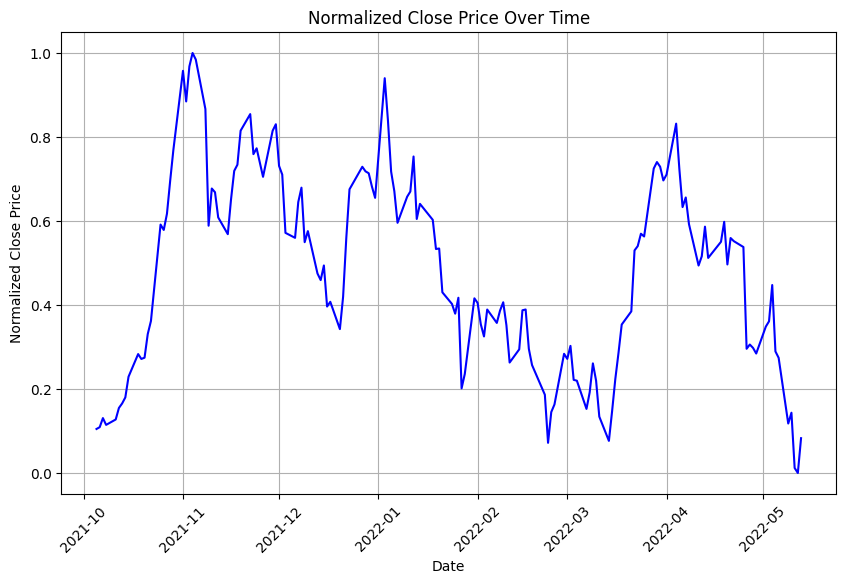

In [14]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['normalized_close'], color='blue')
plt.title('Normalized Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
